In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
## 1. DataSet Aleatoire

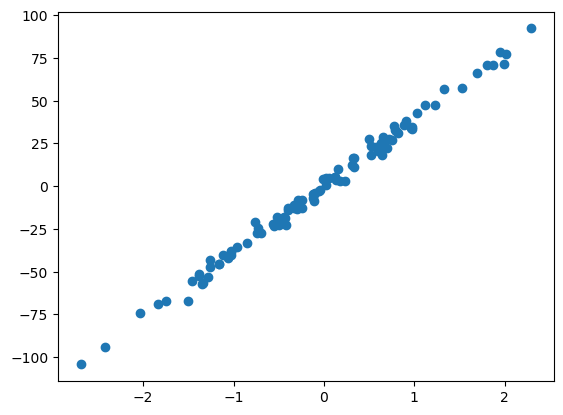

In [3]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 3)
plt.scatter(x, y)

In [4]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)
##print(x,"\n\n", y)

(100, 1)
(100, 1)


In [5]:
#matrice X
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


In [6]:
theta = np.random.randn(2, 1)
theta.shape

(2, 1)

## Model

In [7]:
def model(X, theta):
    return (X.dot(theta))

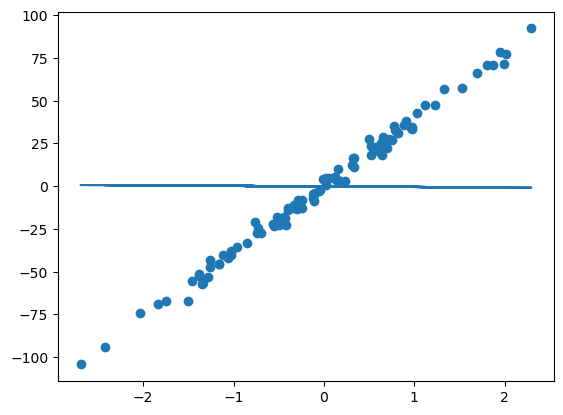

In [8]:
plt.scatter(x, y)
plt.plot(x, model(X, theta))

## Cost Function

In [9]:
def cost_func(X, y, theta):
    m = len(y)
    n = 1/ (2* m) * np.sum(np.power(model(X, theta) - y, 2))
    return n

In [10]:
cost_func(X, y, theta)

785.9430114346958

## Gradient Descente du Gradiant


In [11]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * (X.T.dot(model(X, theta) - y))

In [12]:
def gradient_descent(X, y, theta, learning_rate, n_ite):
    for i in range(0, n_ite):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta




## Machine_learning

In [13]:
theta_final = gradient_descent(X, y, theta, learning_rate= 0.01, n_ite = 1000)

In [14]:
theta_final

array([[38.73804383],
       [ 0.13542191]])

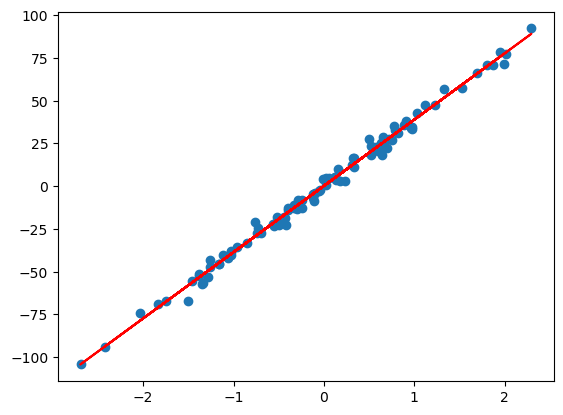

In [15]:
prediction = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, prediction, c = 'r')

## Coefficent determination

In [16]:
def coef_det(x, pred):
    u = np.power((y - pred), 2).sum()
    v = np.power((y - y.mean()), 2).sum()
    return 1 - u/v

In [17]:
coef_determination = coef_det(y, prediction)
print(coef_determination)

0.993639641543006


## Import data for reg_lin

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv('data.csv', delimiter=",")

In [20]:
data.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


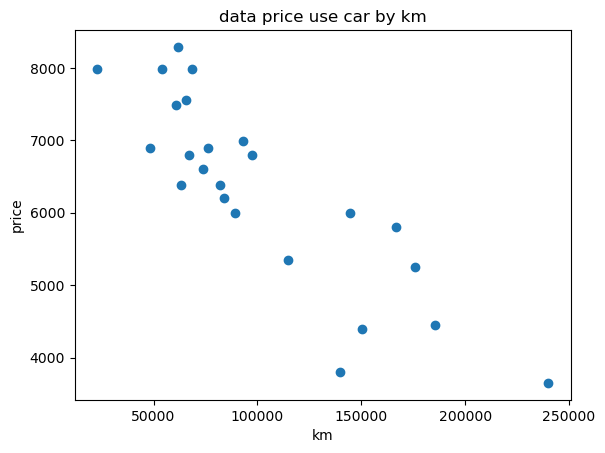

In [21]:
plt.scatter(data['km'], data['price'])
plt.title("data price use car by km")
plt.ylabel("price")
plt.xlabel("km")
plt.show()

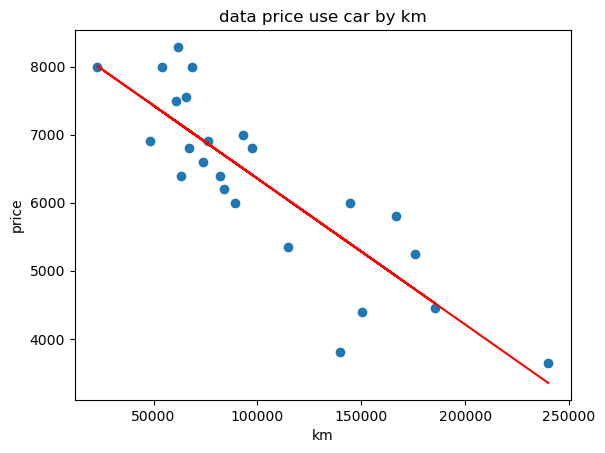

In [24]:
theta = np.zeros((2, 1))
x = data['km']
y = data['price']


x = x.values.reshape(x.shape[0], 1)
y = y.values.reshape(y.shape[0], 1)


mean = x[0:].mean()
std = x[0:].std()

x_std = (x[0:] - mean) / std


X = np.hstack((x_std, np.ones(x.shape)))

theta_hist = [[0.0, 0.0]]

theta_final = gradient_descent(X, y, theta, learning_rate= 0.065, n_ite = 190)
prediction = model(X, theta_final)
plt.scatter(data['km'], data['price'])
plt.title("data price use car by km")
plt.ylabel("price")
plt.xlabel("km")
plt.plot(x, prediction , c = 'r')